<a href="https://colab.research.google.com/github/Himanshucode77/Case_Study/blob/main/Apollo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Business Case: Apollo Hospitals - Hypothesis Testing**

## **About Apollo**

Apollo Hospitals was established in 1983, renowned as the architect of modern healthcare in India. As the nation's first corporate hospital, Apollo Hospitals is acclaimed for pioneering the private healthcare revolution in the country.


As a data scientist working at Apollo 24/7, the ultimate goal is to tease out meaningful and actionable insights from Patient-level collected data.


One of the best examples of data scientists making a meaningful difference at a global level is in the response to the COVID-19 pandemic, where they have improved information collection, provided ongoing and accurate estimates of infection spread and health system demand, and assessed the effectiveness of government policies.

## **Problem Statement**

To determine the following from the data set:
- Which variables are significant in predicting the reason for hospitalization for different regions
- How well some variables like viral load, smoking, Severity Level describe the hospitalization charges

## **Column Profiling**

**Age**: This is an integer indicating the age of the primary beneficiary (excluding those above 64 years, since they are generally covered by the government).

**Sex**: This is the policy holder's gender, either male or female

**Viral Load**: Viral load refers to the amount of virus in an infected person's blood

**Severity Level**: This is an integer indicating how severe the patient is.

**Smoker**: This is yes or no depending on whether the insured regularly smokes tobacco.

**Region**: This is the beneficiary's place of residence in Delhi, divided into four geographic regions - northeast, southeast, southwest, or northwest.

**Hospitalization charges**: Individual medical costs billed to health insurance

## **Analysing basic metrics**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from collections import Counter
from scipy.stats import chi2_contingency
from scipy.stats import shapiro
from scipy.stats import levene
from scipy.stats import f_oneway
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/681/original/scaler_apollo_hospitals.csv')

In [ ]:
df.head()

,Unnamed: 0,age,sex,smoker,region,viral load,severity level,hospitalization charges
0,0,19,female,yes,southwest,9.30,0,42212
1,1,18,male,no,southeast,11.26,1,4314
2,2,28,male,no,southeast,11.00,3,11124
3,3,33,male,no,northwest,7.57,0,54961
4,4,32,male,no,northwest,9.63,0,9667


In [ ]:
df.info()
#data type of all attributes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               1338 non-null   int64  
 1   age                      1338 non-null   int64  
 2   sex                      1338 non-null   object 
 3   smoker                   1338 non-null   object 
 4   region                   1338 non-null   object 
 5   viral load               1338 non-null   float64
 6   severity level           1338 non-null   int64  
 7   hospitalization charges  1338 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 83.8+ KB


There are 3 numerical variables - age, viral load and hospitalizatoin charges and 4 categorical variables - sex, smoker, region, severity level

In [ ]:
df.shape

(1338, 8)

We have 7 features and 1338 observations.

## **Examining Data(male/female, smoker/non-smoker) & Data Preprocessing**

In [ ]:
df = df.drop(columns = ['Unnamed: 0'])

In [ ]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,1338.0,NaN,NaN,NaN,39.207025,14.04996,18.0,27.0,39.0,51.0,64.0
sex,1338,2,male,676,NaN,NaN,NaN,NaN,NaN,NaN,NaN
smoker,1338,2,no,1064,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region,1338,4,southeast,364,NaN,NaN,NaN,NaN,NaN,NaN,NaN
viral load,1338.0,NaN,NaN,NaN,10.221233,2.032796,5.32,8.7625,10.13,11.5675,17.71
severity level,1338.0,NaN,NaN,NaN,1.094918,1.205493,0.0,0.0,1.0,2.0,5.0
hospitalization charges,1338.0,NaN,NaN,NaN,33176.058296,30275.029296,2805.0,11851.0,23455.0,41599.5,159426.0


As we can see in hospitalization charges there are some outliers.

In [ ]:
df[df['sex']=='male'].describe().T
#male stats w.r.t. other features.

,count,mean,std,min,25%,50%,75%,max
age,676.0,38.917160,14.050141,18.00,26.0,39.00,51.0000,64.00
viral load,676.0,10.314423,2.046889,5.32,8.8,10.23,11.6625,17.71
severity level,676.0,1.115385,1.218986,0.00,0.0,1.00,2.0000,5.00
hospitalization charges,676.0,34891.884615,32427.562163,2805.00,11548.0,23424.00,47473.7500,156482.00


In [ ]:
df[df['sex']=='female'].describe().T
#male stats w.r.t. other features.

,count,mean,std,min,25%,50%,75%,max
age,662.0,39.503021,14.054223,18.0,27.00,40.000,51.7500,64.00
viral load,662.0,10.126073,2.015402,5.6,8.71,10.035,11.4375,16.02
severity level,662.0,1.074018,1.192115,0.0,0.00,1.000,2.0000,5.00
hospitalization charges,662.0,31423.945619,27821.764763,4019.0,12213.25,23532.500,36136.7500,159426.00


In [ ]:
df[df['smoker']=='yes'].describe().T
#smokers stats w.r.t. other features.

,count,mean,std,min,25%,50%,75%,max
age,274.0,38.514599,13.923186,18.00,27.000,38.00,49.00,64.00
viral load,274.0,10.236204,2.106612,5.73,8.695,10.15,11.73,17.53
severity level,274.0,1.113139,1.157066,0.00,0.000,1.00,2.00,5.00
hospitalization charges,274.0,80125.572993,28853.891137,32074.00,52065.500,86141.00,102548.25,159426.00


In [ ]:
df[df['smoker']=='no'].describe().T
#non-smokers stats w.r.t. other features.

,count,mean,std,min,25%,50%,75%,max
age,1064.0,39.385338,14.083410,18.00,26.75,40.000,52.00,64.00
viral load,1064.0,10.217378,2.014349,5.32,8.77,10.115,11.48,17.71
severity level,1064.0,1.090226,1.218136,0.00,0.00,1.000,2.00,5.00
hospitalization charges,1064.0,21085.675752,14984.455500,2805.00,9966.25,18363.500,28407.25,92277.00


In [ ]:
df.isna().sum()
#counting the number of null values

age                        0
sex                        0
smoker                     0
region                     0
viral load                 0
severity level             0
hospitalization charges    0
dtype: int64

There are no missing values in the data.

In [ ]:
df.duplicated().any()
#check duplicate data in the dataset

True

In [ ]:
for i in range(len(df.duplicated())):
  if df.duplicated()[i]:
    print(i, df.duplicated()[i])



581 True


Only one duplicate value so we can ignore it.

## **Value counts and unique attributes ​​**

In [ ]:
df.nunique().sort_values()

sex                           2
smoker                        2
region                        4
severity level                6
age                          47
viral load                  462
hospitalization charges    1320
dtype: int64

* sex, smoker and region are categorical data with 2, 2 and 4 unique values.
* Severity level have also categorical values with 6 unique values. 
* Age, Viral load and hospitalization charges are continuous numerical data</b>

In [ ]:
print('Sex: ', df['sex'].unique())
print('Smoker: ', df['smoker'].unique())
print('Severity level: ', df['severity level'].unique())
print('Region : ', df['region'].unique())

Sex:  ['female' 'male']
Smoker:  ['yes' 'no']
Severity level:  [0 1 3 2 5 4]
Region :  ['southwest' 'southeast' 'northwest' 'northeast']


In [ ]:
df["severity level"]=df["severity level"].astype('object')
df.describe(include=['object']).transpose()

,count,unique,top,freq
sex,1338,2,male,676
smoker,1338,2,no,1064
region,1338,4,southeast,364
severity level,1338,6,0,574


In [ ]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [ ]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [ ]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [ ]:
df['severity level'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: severity level, dtype: int64

## **Univariate & Bivariate Analysis**

In [ ]:
#Uni-Variate Analysis
def plot_uni(d):
    f,ax = plt.subplots(nrows=1,ncols=2,figsize=(10,5))
    sns.histplot(d, kde=True, ax=ax[0])
    sns.boxplot(x=d, showmeans=True, ax=ax[1])
    plt.tight_layout()

In [ ]:
num_cols = df.select_dtypes('float64').columns.values
num_cols

array(['viral load'], dtype=object)

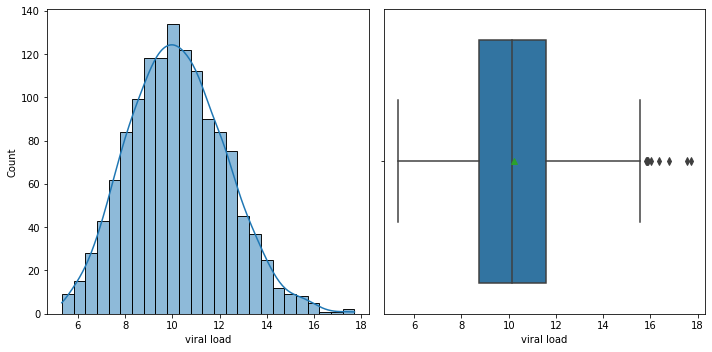

In [ ]:
for i in num_cols:
    plot_uni(df[i])

Looks Viral load is uniformally distributed , has a median close to 10.

In [ ]:
num_cols1 = df.select_dtypes('int64').columns.values
num_cols1

array(['age', 'hospitalization charges'], dtype=object)

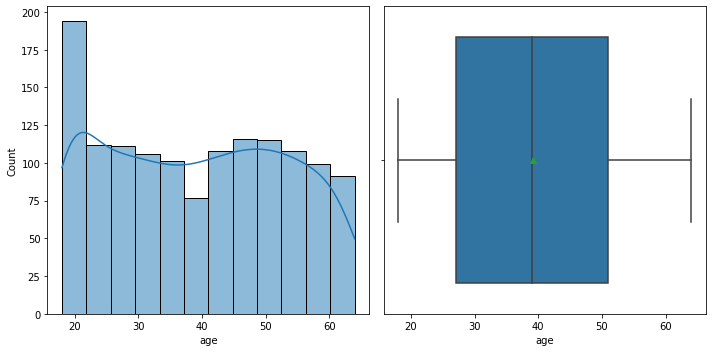

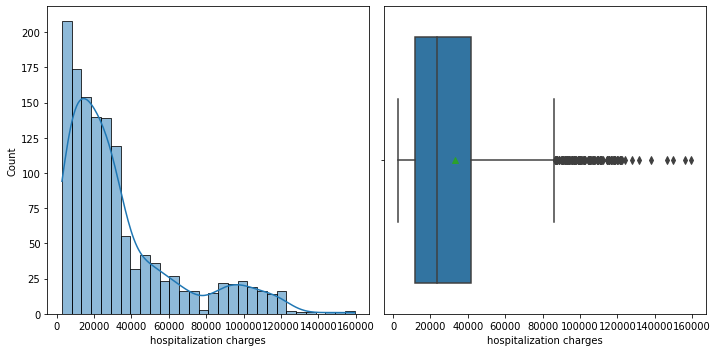

In [ ]:
for i in num_cols1:
    plot_uni(df[i])

Hospitalization charges has right skewed data and so many outliers.

In [ ]:
def cat_feat(col_data):
  fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(12,5))
  fig.suptitle(col_data.name,fontsize=15, horizontalalignment='center', verticalalignment='bottom')
  sns.countplot(col_data,ax=ax[0])
  col_data.value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1])
  plt.tight_layout()

In [ ]:
cat_cols = ['sex','smoker','region','severity level']

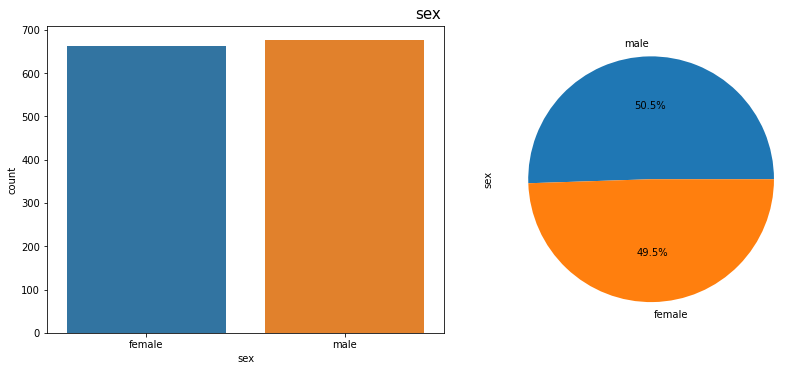

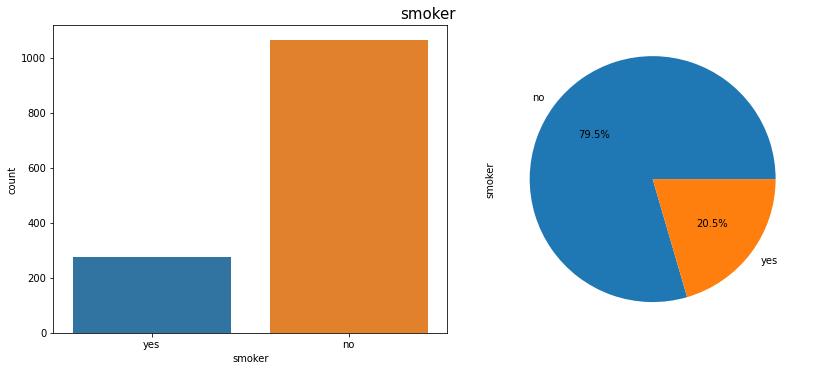

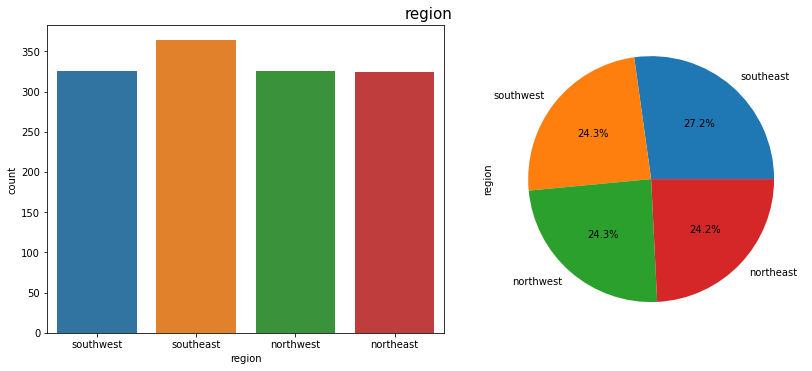

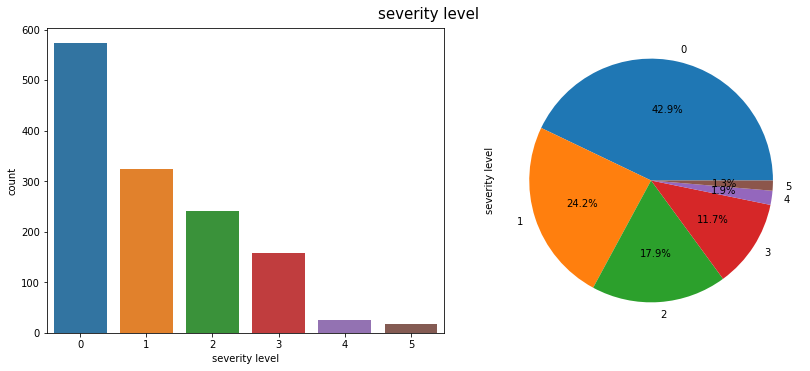

In [ ]:
for i in cat_cols:
  cat_feat(df[i])

No. of male & females are almost equal.

Smokers are 1/5th in number in comparison to non-smokers.

All regions are equally devided.

Most people are under Severity Level 0,1,2.



In [ ]:
df.corr()

,age,viral load,hospitalization charges
age,1.000000,0.109300,0.299008
viral load,0.109300,1.000000,0.198388
hospitalization charges,0.299008,0.198388,1.000000


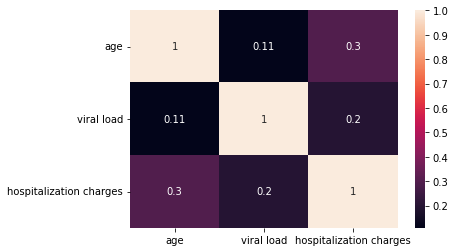

In [ ]:
sns.heatmap(df.corr(),annot=True)

We see that there is some correlation between:
- age and hospitalization charges
- Viral load and hospitalization charges
- age and viral load


In [ ]:
pd.crosstab(df['severity level'], df['smoker'])
#Cross-Tabulation B/w 'severity level' & 'smoker'.

smoker,no,yes
severity level,,
0,459,115
1,263,61
2,185,55
3,118,39
4,22,3
5,17,1


In [ ]:
pd.crosstab(df['severity level'], df['region'])
#Cross-Tabulation B/w 'severity level' & 'region'.

region,northeast,northwest,southeast,southwest
severity level,,,,
0,147,132,157,138
1,77,74,95,78
2,51,66,66,57
3,39,46,35,37
4,7,6,5,7
5,3,1,6,8


In [ ]:
pd.crosstab(df['severity level'], df['sex'])
#Cross-Tabulation B/w 'severity level' & 'sex'.

sex,female,male
severity level,,
0,289,285
1,158,166
2,119,121
3,77,80
4,11,14
5,8,10


In [ ]:
pd.crosstab(df['region'], df['smoker'])
#Cross-Tabulation B/w 'region' & 'smoker'.

smoker,no,yes
region,,
northeast,257,67
northwest,267,58
southeast,273,91
southwest,267,58


Southeast has highest number of smokers.

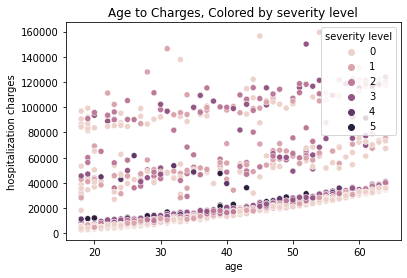

In [ ]:
sns.scatterplot('age', 'hospitalization charges', hue='severity level', data=df);
plt.title('Age to Charges, Colored by severity level');
## Visualizing Age vs hospital charges using scatterplot (bivariate plot)

we can see as slight linear line forming in the bottom suggesting as the age increases the charges increase


but when we see the whole plot we can see the severity level being scattered throughout the age groups

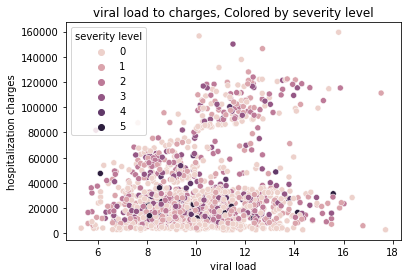

In [ ]:
sns.scatterplot('viral load', 'hospitalization charges', hue='severity level', data=df);
plt.title('viral load to charges, Colored by severity level');
## Visualizing virus in blood vs hospital charge using scatterplot (bivariate plot)

we can see a mean of viral_load around 10-14, with charges circling around 20k to 65k charges

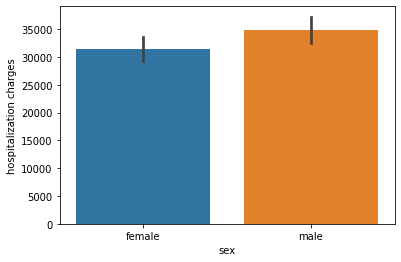

In [ ]:
sns.barplot(y='hospitalization charges',x='sex',data=df)

Male accounts for more Hospitalization charges than females.

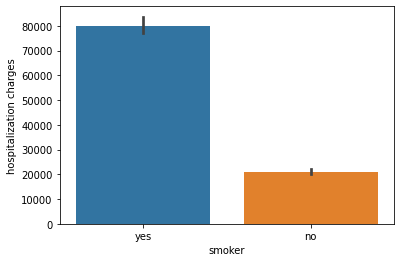

In [ ]:
sns.barplot(y='hospitalization charges',x='smoker',data=df)

As expected Smokers account for far more Hospitalization charges than non-smokers.

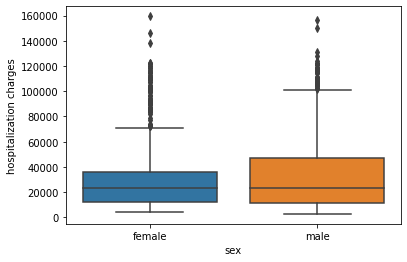

In [ ]:
sns.boxplot(data=df,x='sex',y='hospitalization charges')

Median Charges for males & females are same. 

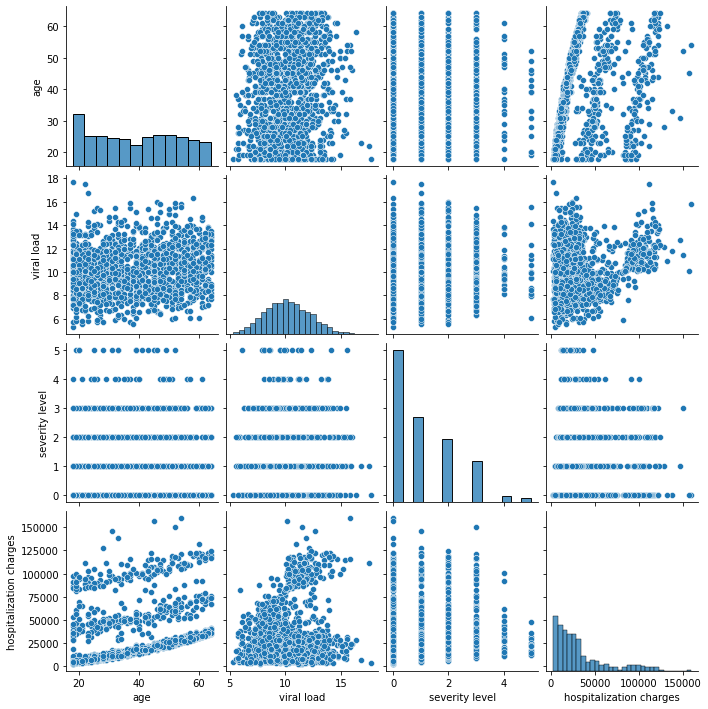

In [ ]:
sns.pairplot(data=df)

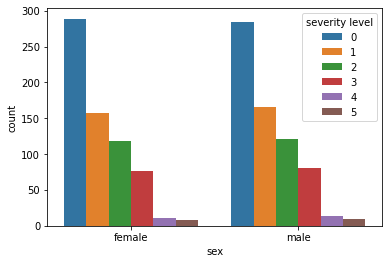

In [ ]:
sns.countplot(x="sex", hue = "severity level", data=df)

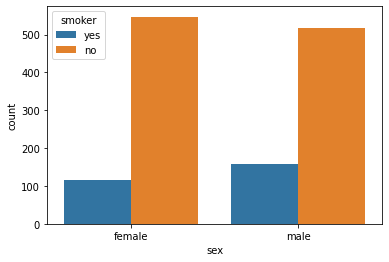

In [ ]:
sns.countplot(x="sex", hue = "smoker", data=df)

No. of male smokers are more than females. 

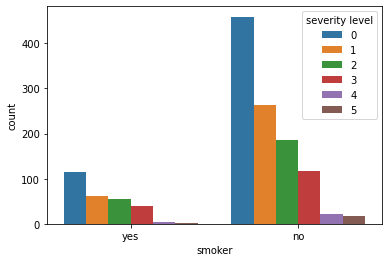

In [ ]:
sns.countplot(x="smoker", hue = "severity level", data=df)

Plot shows non-smokers more severe than smokers.

In [ ]:
#grouping age into bins
bins = [0,18,28,38,48,58,68]
labels = ['0-18','18-28','28-38','38-48','48-58','58-68']
df['age bins'] = pd.cut(df['age'], bins, labels)

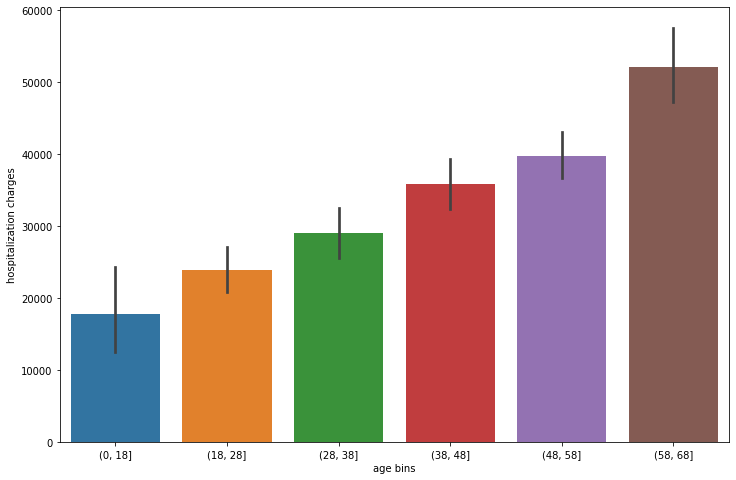

In [ ]:
plt.figure(figsize = (12,8))
sns.barplot(x='age bins', y = 'hospitalization charges', data = df)

Plot shows as Age increases , the hospitalization charges increase naturally.

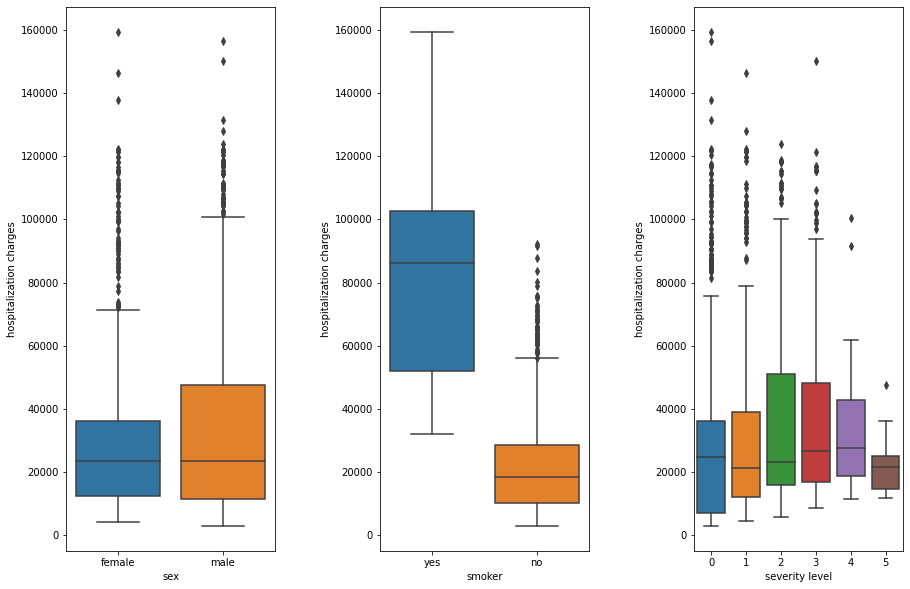

In [ ]:
plt.figure(figsize = (15,10))
cat_cols = ['sex', 'smoker', 'severity level']
for i,j in enumerate(cat_cols):
  #row 1, col 3, index begins i is 1 based hence i+1
  plt.subplot(1,3,i+1)
  plt.subplots_adjust(wspace = 0.5, hspace = 2)
  sns.boxplot(x=j, y ='hospitalization charges', data=df)

Except for smokers the hospitalization charges do not change across sex, severity level and region

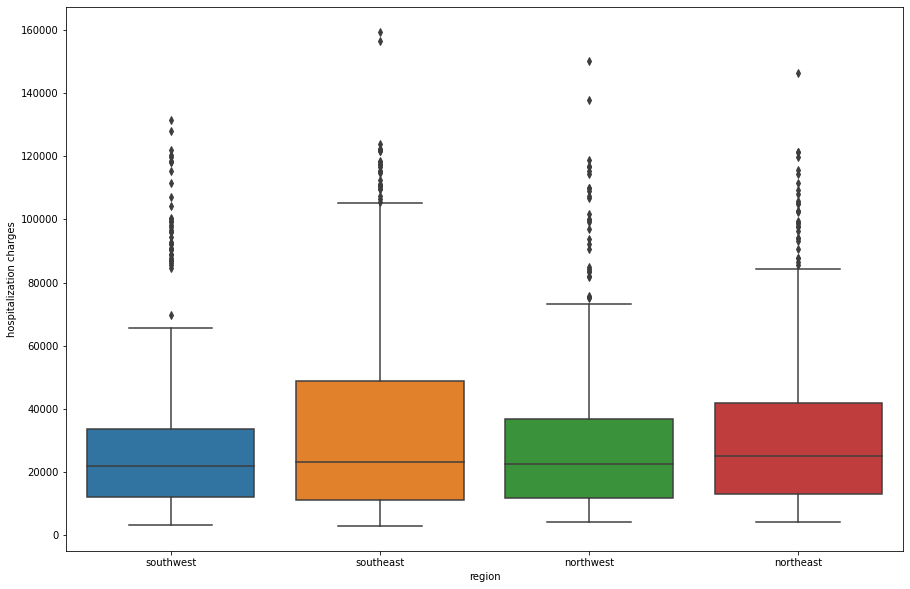

In [ ]:

plt.figure(figsize = (15,10))
sns.boxplot(x='region', y ='hospitalization charges', data=df)

Median Charges are same across regions.

In [ ]:
df.groupby(['sex','smoker','age bins'])['hospitalization charges'].mean().unstack()

age bins            (0, 18]      (18, 28]      (28, 38]      (38, 48]  \
sex    smoker                                                           
female no       9291.862069  13081.352000  14050.326923  22979.908257   
       yes     67156.000000  62991.233333  77482.782609  76219.586207   
male   no       6739.285714   9617.187500  16996.948454  21754.786408   
       yes     61948.750000  76063.710526  74800.942857  83855.457143   

age bins           (48, 58]       (58, 68]  
sex    smoker                               
female no      31545.153226   39288.660714  
       yes     90458.214286   93530.866667  
male   no      29646.357798   36771.500000  
       yes     91621.370370  107589.625000

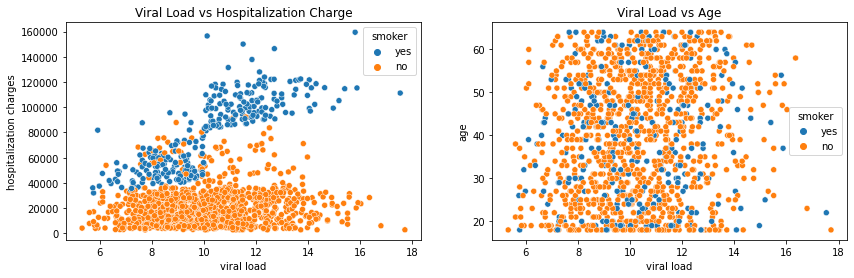

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(14,4))
sns.scatterplot(x = df["viral load"], y = df["hospitalization charges"],ax=ax[0], hue=df["smoker"])
sns.scatterplot(x = "viral load", y = "age", hue="smoker",data = df, ax=ax[1])
ax[0].set_title("Viral Load vs Hospitalization Charge")
ax[1].set_title("Viral Load vs Age")
plt.show()

Visually, there does not seem to be a clear correlation between viral load and hospitalization charges.

However smokers and non smokers clearly have different clusters (as we saw earlier that smoking status affects hospitalization charge).

There does not seem to be a clear correlation between viral load and age.

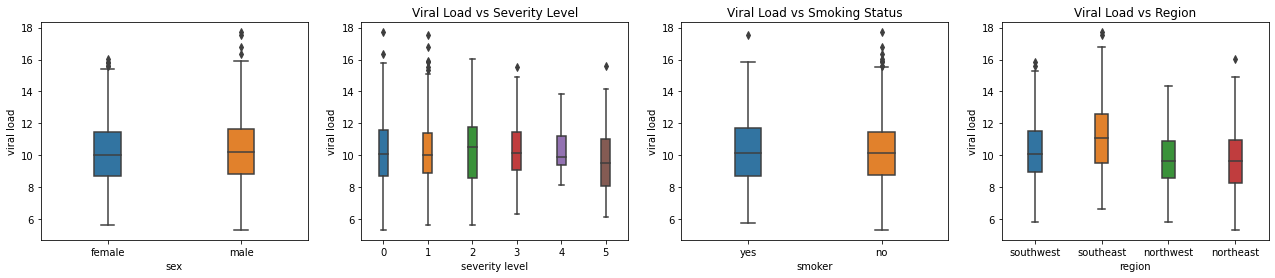

In [ ]:
fig, ax = plt.subplots(1,4,figsize=(22,4))
sns.boxplot(x = "sex", y = "viral load", width = 0.2, data = df, ax=ax[0])
sns.boxplot(x = "severity level", y = "viral load", width = 0.2, data = df,ax=ax[1])
sns.boxplot(x = "smoker", y = "viral load", width = 0.2, data = df, ax=ax[2])
sns.boxplot(x = "region", y = "viral load", width = 0.2, data = df, ax=ax[3])
ax[1].set_title("Viral Load vs Severity Level")
ax[2].set_title("Viral Load vs Smoking Status")
ax[3].set_title("Viral Load vs Region")
plt.show()

We observe the following: - There does not seem to be much difference between the virl load of male and female patients. - There again does not seem to be a clear relation between severity levels
and viral load. - Viral load of smokers seems to be lower than non-smokers. (Since lower CT values
indicate higher load, it appears that the viral load reported is actually the CT value. So smokers
have lower CT values and hence higher load). - Patients from SouthEast seem to have highest CT
value (lowest viral load).

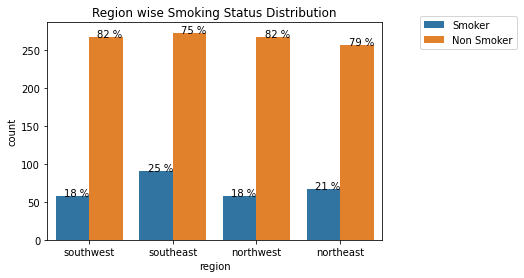

In [ ]:
ax = sns.countplot("region", hue="smoker", data = df)
regs = ['southwest', 'southeast', 'northwest', 'northeast']
totals = [df[df["region"]==reg].count()[0] for reg in regs]*2
i=0
for p in ax.patches:
  txt = str(round(p.get_height()*100/totals[i]))+" %"
  txt_x = p.get_x()
  txt_y = p.get_height()
  ax.text(txt_x+0.1,txt_y,txt)
  i+=1
ax.legend(bbox_to_anchor=(1.1, 1.05), labels=["Smoker","Non Smoker"])
plt.title("Region wise Smoking Status Distribution")
plt.show()

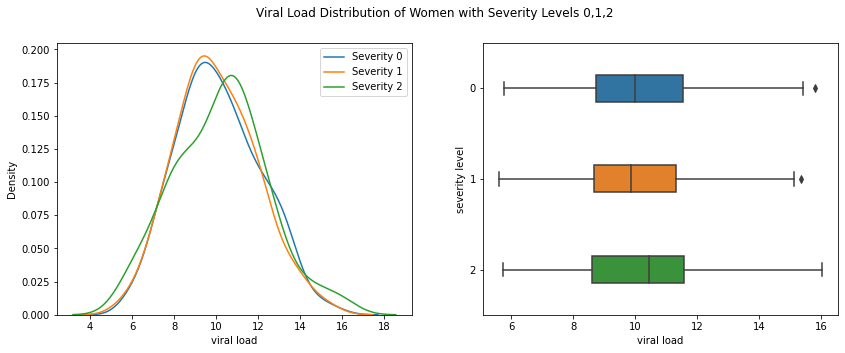

In [ ]:
w = df[(df["sex"]=="female") & (df["severity level"].isin([0,1,2]))]
fig, ax = plt.subplots(1,2,figsize=(14,5))
sns.distplot(w[w["severity level"]==0]["viral load"], label="Severity 0",hist=False, ax=ax[0])
sns.distplot(w[w["severity level"]==1]["viral load"], label="Severity 1",hist=False, ax=ax[0])
sns.distplot(w[w["severity level"]==2]["viral load"], label="Severity 2",hist=False, ax=ax[0])
ax[0].legend()
#sns.boxplot(x=w["viral load"],y=w["severity level"], width = 0.3, orient="h",ax=ax[1])
sns.boxplot(x=df[(df["sex"]=="female") & (df["severity level"].isin([0,1,2]))]["viral load"], y=df[df["severity level"].isin([0,1,2])]["severity level"], orient="h", width=0.3, ax=ax[1])
plt.suptitle("Viral Load Distribution of Women with Severity Levels 0,1,2")
plt.show()

In [ ]:
df.groupby(["severity level"])["viral load"].mean()[0:3]

severity level
0    10.183693
1    10.207562
2    10.326083
Name: viral load, dtype: float64

• The viral load distributions for severity levels 0 and 1 seem to follow similar distributions.
Severity level 2 is slightly different.

• However the mean viral load is almost same across all the groups.

## **Remove outliers for Hospitalization Charges**

In [ ]:
q1 = df['hospitalization charges'].quantile(0.25)
q3 = df['hospitalization charges'].quantile(0.75)
iqr = q3 - q1;
df = df[(df['hospitalization charges'] > (q1 - 1.5*iqr)) & (df['hospitalization charges'] < (q3 + 1.5*iqr))]

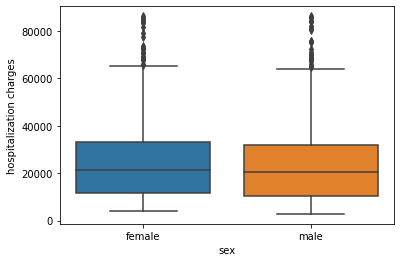

In [ ]:
sns.boxplot(data=df,x='sex',y='hospitalization charges')

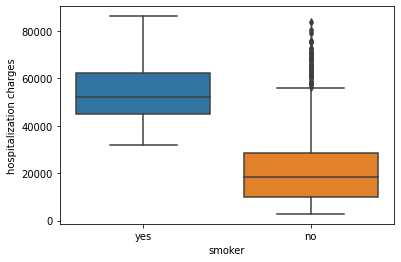

In [ ]:
sns.boxplot(data=df,x='smoker',y='hospitalization charges')

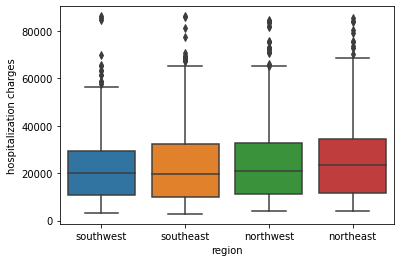

In [ ]:
sns.boxplot(data=df,x='region',y='hospitalization charges')

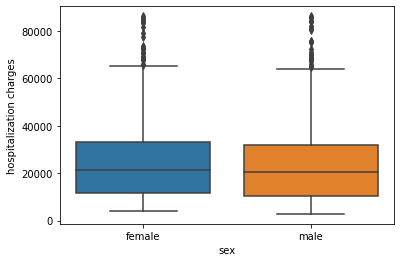

In [ ]:
sns.boxplot(data=df,x='sex',y='hospitalization charges')

From the grahical analysis, we see that:
- Hospitalization charges are about same for male/female gender
- Hospitalization charges are significantly high for smokers
- Viral load is high in south east region compared to other regions

Now, we use hypothesis testing to support our claims in grahical metric analysis of numeric and non-numeric(categorical) data

# **Hypothesis Testing**

## **Prove (or disprove) that the hospitalization of people who do smoking is greater than those who don't?**

H0 : The hospitalization of people who do smoke are not greater than to those who don't

Ha : The hospitalization of people who do smoke are greater than to those who don't

We will conduct a independent-test with 
1. Two sample 
2. Two Tailed 
3. Independent Samples

Let’s take alpha to be = 0.05

First we will verify the assumptions for t-test.

*The samples are drawn from a Gaussian distribution.

*The size of each sample is approximately equal.

*The samples have the same variance and then perform the actual test

In [ ]:
df.groupby(['smoker'])['hospitalization charges'].describe()

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
no,1061.0,20889.284637,14541.903769,2805.0,9955.0,18344.0,28383.0,83680.0
yes,138.0,55035.586957,13792.707698,32074.0,44784.5,52197.0,62048.5,86182.0


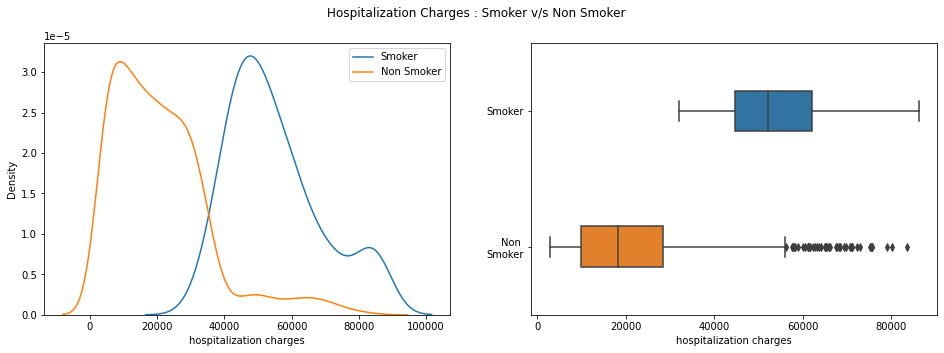

In [ ]:
smoker = df[df["smoker"]=="yes"]
nonsmoker = df[df["smoker"]=="no"]
fig, ax = plt.subplots(1,2,figsize=(16,5))
sns.distplot(smoker["hospitalization charges"], hist=False, ax=ax[0],label="Smoker")
sns.distplot(nonsmoker["hospitalization charges"], hist=False, ax=ax[0],label="Non Smoker")
ax[0].legend()
sns.boxplot(x=df["hospitalization charges"], y=df["smoker"], orient="h",width=0.3, ax=ax[1])
ax[1].set_yticklabels(["Smoker","Non \nSmoker"])
ax[1].set_ylabel(" ")
plt.suptitle("Hospitalization Charges : Smoker v/s Non Smoker")
plt.show()

As we see from the above visualizations, neither of the groups follow normal distribution. (Even though mean hospitalization charge for smokers looks a lot higher than non smokers)

We will try to convert them to normal using the box-cox trasnform

In [ ]:
import statsmodels.api as sms

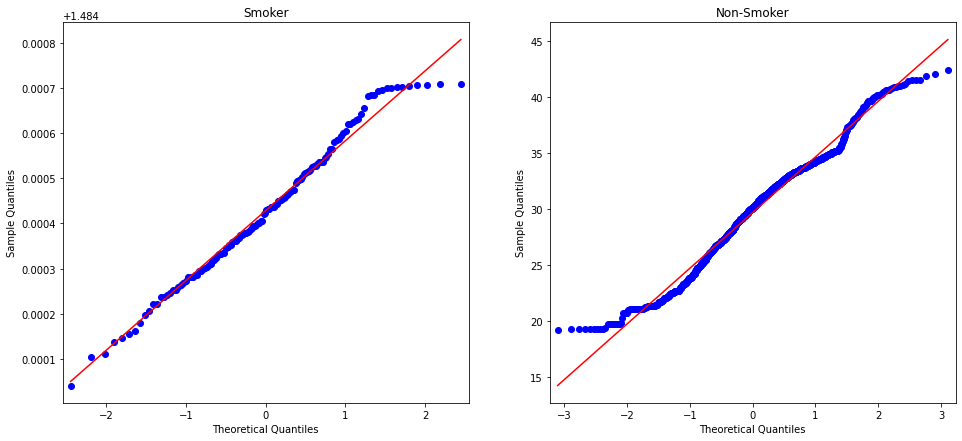

In [ ]:
sm_transformed, lambda_sm = stats.boxcox(smoker["hospitalization charges"])
nsm_transformed, lambda_nsm = stats.boxcox(nonsmoker["hospitalization charges"])
fig,ax = plt.subplots(1,2,figsize=(16,7))
sms.qqplot(sm_transformed, line='s', ax=ax[0])
sms.qqplot(nsm_transformed, line='s', ax=ax[1])
ax[0].set_title("Smoker")
ax[1].set_title("Non-Smoker")
plt.show()

So we see that even with BoxCox transformation, we do not get normal data.

 **Shapiro Wilk Normality Test**

In [ ]:
sm_transformed = np.random.choice(sm_transformed, size=138)
nsm_transformed = np.random.choice(nsm_transformed, size=138)

In [ ]:
stats.shapiro(sm_transformed)

ShapiroResult(statistic=0.9747868776321411, pvalue=0.011653153225779533)

In [ ]:
stats.shapiro(nsm_transformed)

ShapiroResult(statistic=0.9635916948318481, pvalue=0.0009750649333000183)

In [ ]:
sm_original = smoker["hospitalization charges"].sample(138)
nsm_original = nonsmoker["hospitalization charges"].sample(138)

In [ ]:
stats.shapiro(sm_original)

ShapiroResult(statistic=0.9242499470710754, pvalue=1.0100677627633559e-06)

In [ ]:
stats.shapiro(nsm_original)

ShapiroResult(statistic=0.823886513710022, pvalue=1.4095300447658499e-11)

As we see above, even after performing BoxCox Transform, we do not get normal distributions.

We performed shapiro test on both transformed and original variables. For all the tests, p-value is a lot less than 0.05. Hence we reject the shapiro null that the data is drawn from normal distributions.
In ohter words, we conclude that the data is not drawn from normal distribution. And since the box cox transform did not help, we simply work with the original data.

**Levene’s test for equality of variance**

In [ ]:
stats.levene(sm_original, nsm_original, center="median")

LeveneResult(statistic=0.9857152507771864, pvalue=0.3216678199648356)

In [ ]:
stats.levene(sm_original, nsm_original, center="mean")

LeveneResult(statistic=1.857689374680358, pvalue=0.17401074360725327)

We performed Levene’s test for the original using both median and mean centering methods. 

In both cases, the p-value is greater than 0.05.

So, we fail to reject the Null Hypothesis. 
This means we have sufficient evidence to say that the variance
in hospitalization charges between smoker and non smoker is nearly equal.

**T - Test (2 Sample, Right Tailed)**

H0 (Null Hypothesis) : Mean hospitalization charge of smoker is equal to non smoker (μsmoker <=μnon−smoker)

HA (Alternate Hypothesis) : Mean hospitalization charge of smoker is greater than non smoker.(μsmoker > μnon−smoker)

Significance Level : 0.05

In [ ]:
stats.ttest_ind(sm_original, nsm_original, alternative='greater',equal_var=False)

Ttest_indResult(statistic=17.682121565290053, pvalue=8.195992207388618e-47)

So we performed T-test and found the p-value to be much less than 0.05. So we reject the null hypothesis.

Conclusion : 

**Thus it appears from the test above that the mean hospitalization charge of smokers in indeed significantly greater than that of non-smokers.**

## **Prove (or disprove) with statistical evidence that the viral load of females is different from that of males.**

In [ ]:
df.groupby(['sex'])['viral load'].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
female,612.0,9.978186,1.981809,5.60,8.595,9.86,11.1875,16.02
male,587.0,10.087700,2.026193,5.32,8.610,9.94,11.3550,17.71


(We don’t need to pick samples since both males and females have almost equal counts)

We check the assumptions (Normality of underlying data of two groups and equality of variances of the two groups).

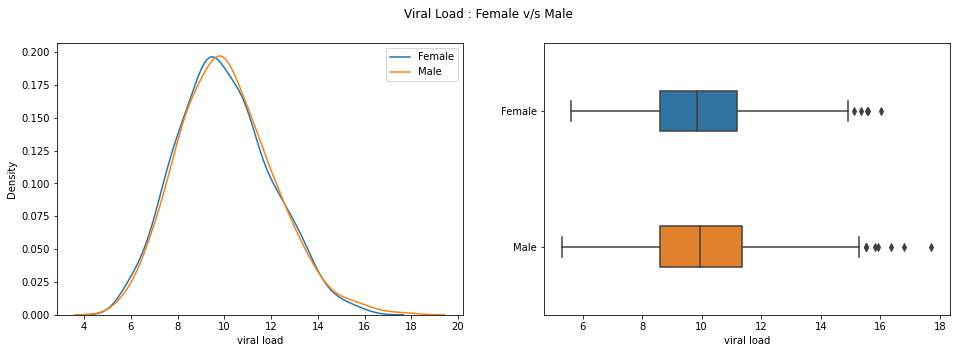

In [ ]:
female = df[df["sex"]=="female"]
male = df[df["sex"]=="male"]
fig, ax = plt.subplots(1,2,figsize=(16,5))
sns.distplot(female["viral load"], hist=False, ax=ax[0], label="Female")
sns.distplot(male["viral load"], hist=False, ax=ax[0], label="Male")
ax[0].legend()
sns.boxplot(x=df["viral load"], y=df["sex"], orient="h", width=0.3, ax=ax[1])
ax[1].set_yticklabels(["Female","Male"])
ax[1].set_ylabel(" ")
plt.suptitle("Viral Load : Female v/s Male")
plt.show()

As we see from the above visualizations, both the groups appear to follow normal distribution. 

We verify the same using the Shapiro test.

**Shapiro-Wilk Normality test**

In [ ]:
stats.shapiro(female["viral load"])

ShapiroResult(statistic=0.9913455247879028, pvalue=0.0012043039314448833)

In [ ]:
stats.shapiro(male["viral load"])

ShapiroResult(statistic=0.9884631633758545, pvalue=0.00013969729479867965)

**Q-Q Plot**

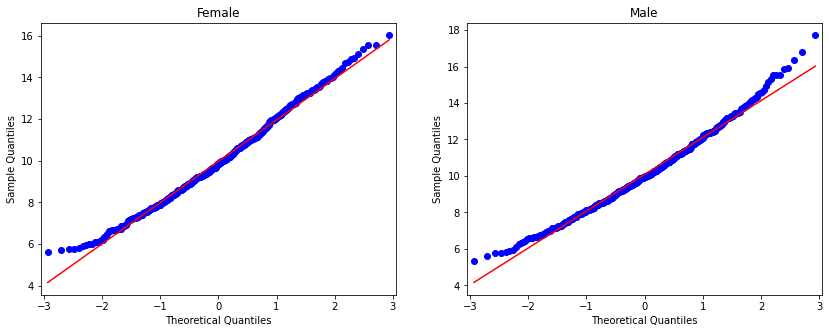

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(14,5))
sms.qqplot(female["viral load"], line='s', ax=ax[0])
sms.qqplot(male["viral load"], line='s', ax=ax[1])
ax[0].set_title("Female")
ax[1].set_title("Male")
plt.show()

Considering alpha = 0.05, 

we see that despite curves seeming normal from visualization, 
shapiro test gives a p-value of 0.004 and 0.002 and hence we reject the shapiro null that the data is drawn from normal distribution.

However from the previous visualization of the distributions and the Q-Q Plot, they look approximately normal and thus can be assumed as such for practical purposes.

We will next check for equality of variances.

**Levene’s test for equality of variance**

In [ ]:
stats.levene(female["viral load"], male["viral load"], center='mean') 
#we use center as mean since the data is not much skewed

LeveneResult(statistic=0.009680976302976903, pvalue=0.9216375380493854)

We performed Levene’s test for the transformed data.

The p-value is much greater than 0.05. 

So, we fail to reject the Null Hypothesis. 

This means the variance in viral load between female and male patients is not significantly different.

**T - Test (2 Sample, Right Tailed)**

H0 (Null Hypothesis) : Mean viral load of female is equal to male (μfemale == μmale)

HA (Alternate Hypothesis) : Mean viral load of female is greater than non smoker. (μfemale! =μmale)

Significance Level : 0.05

In [ ]:
stats.ttest_ind(female["viral load"],male["viral load"], alternative="two-sided",equal_var=True)

Ttest_indResult(statistic=-0.9460853706266092, pvalue=0.34429598282535334)

So we performed T-test and found the p-value to be greater than 0.05. So we reject the null hypothesis.

Conclusion : 

**Thus it appears from the tests above that the mean viral load of male and female patients is not significantly different.**

## **Is the proportion of smoking significantly different across different regions?**

We select Chi-sqaure test for independence 

 H0: No association between smoking and region - They are independent

 Ha: Smoking is dependent on region

In [ ]:
subs_table = pd.crosstab(index=df['smoker'],columns=df['region'])
subs_table

region,northeast,northwest,southeast,southwest
smoker,,,,
no,257,267,272,265
yes,39,38,35,26


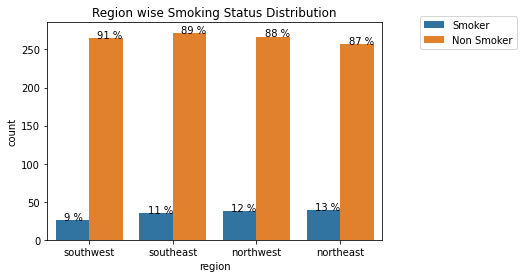

In [ ]:
ax = sns.countplot("region", hue="smoker", data = df)
regs = ['southwest', 'southeast', 'northwest', 'northeast']
totals = [df[df["region"]==reg].count()[0] for reg in regs]*2
i=0
for p in ax.patches:
  txt = str(round(p.get_height()*100/totals[i]))+" %"
  txt_x = p.get_x()
  txt_y = p.get_height()
  ax.text(txt_x+0.1,txt_y,txt)
  i+=1
ax.legend(bbox_to_anchor=(1.1, 1.05), labels=["Smoker","Non Smoker"])
plt.title("Region wise Smoking Status Distribution")
plt.show()

From the visualization, we see that the proportion in fact, is not equal across various regions.

H0 (Null Hypothesis) : The proportion of smoking is not significantly different across different
regions.

HA (Alternate Hypothesis) : The proportion of smoking is significantly different across different
regions.

Significance Level : 0.05

In [ ]:
from scipy.stats import chi2_contingency

In [ ]:
stat, p, dof, expected = chi2_contingency(pd.crosstab(df["smoker"],df["region"]))
expected

array([[261.93160967, 269.89574646, 271.66555463, 257.50708924],
       [ 34.06839033,  35.10425354,  35.33444537,  33.49291076]])

In [ ]:
p

0.3955637450555718

So the p-value is greater than 0.05, and we fail to reject the Null that smoking does not depend on region.

Conclusion : 

**Thus we see that the proportion of smoking in not different across region.**

## **Is the mean viral load of women with 0 Severity level , 1 Severity level, and 2 Severity level the same?** 

In [ ]:
df[df["sex"]=="female"].groupby(['severity level'])['viral load'].describe()[0:3]

,count,mean,std,min,25%,50%,75%,max
severity level,,,,,,,,
0,269.0,9.967212,1.934359,5.76,8.61,9.70,11.13,14.92
1,147.0,9.908844,1.918987,5.60,8.60,9.67,11.13,15.36
2,107.0,10.001776,2.163643,5.73,8.36,10.07,11.24,16.02


Since the severity levels have different counts each, we pick random samples of size 107 each.

In [ ]:
sv0 = df[(df['severity level']==0) & (df['sex']=='female')]['viral load'].sample(107)
sv1 = df[(df['severity level']==1) & (df['sex']=='female')]['viral load'].sample(107)
sv2 = df[(df['severity level']==2) & (df['sex']=='female')]['viral load'].sample(107)

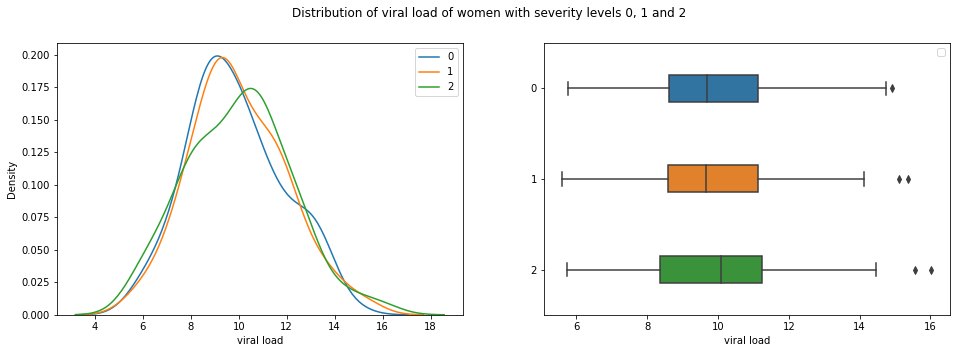

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(16,5))
sns.distplot(sv0, hist=False, label="0", ax=ax[0])
sns.distplot(sv1, hist=False, label="1", ax=ax[0])
sns.distplot(sv2, hist=False, label="2", ax=ax[0])
ax[0].legend()
sns.boxplot(x=df[(df["sex"]=="female") & (df["severity level"].isin([0,1,2]))]["viral load"], y=df[df["severity level"].isin([0,1,2])]["severity level"], orient="h", width=0.3, ax=ax[1])
ax[1].set_ylabel(" ")
plt.legend()
plt.suptitle("Distribution of viral load of women with severity levels 0, 1 and 2")
plt.show()

From the plot above, we can consider the distributions to be approximately normal for practical purposes.

Next we check for equality of variance.

**Levene’s test for equality of variance**

In [ ]:
stats.levene(sv0,sv1,sv2)

LeveneResult(statistic=0.5205578409471184, pvalue=0.5946944370826248)

The p-value is much greater than 0.05. So, we fail to reject the Null Hypothesis. 

This means the variance in viral load of females between different severity levels (0,1,2) is not significantly different.

H0 (Null Hypothesis) : The mean viral load of women with severity levels 0, 1 and 2 are same.
(μ0 = μ1 = μ2)

HA (Alternate Hypothesis) : At least one of the means is different from the others.

Significance Level : 0.05

**One Way ANOVA**

In [ ]:
stats.f_oneway(sv0,sv1,sv2)

F_onewayResult(statistic=0.14452574022957274, pvalue=0.8654894486832565)

So the p-value is much greater than 0.05, and we fail to reject the Null that mean of women with severity level 0,1 and 2 is equal.

Conclusion : 

**Thus we see that the mean viral load of women with different severity levels are not significantly different.**

# **Business Insights**

1. We see that the age group 18-20 has a lot of patients (above 130). The rest of the groups have below 60 patients each.

2. The gender distribution is 50-50 (both genders equally represented) in the data.

3. Nearly 1/4th of the patients are smokers where as 84% are non smokers.

4. All the 4 regions have almost similar distribution (25% each).

5. The viral load ditribution looks approximately normal.

    • The mean viral load is around 10.

6. Severity level 0 has highest observations, followed by 1, 2 and 3. Very few have severiy 4 and above.

7. Hospitalization charges have a distribution with two peaks.

    • Hospitalization Charges incurred increases with increase in age.

    • Hospitalization charges increase with age for each gender.

    • In age 10-50 males tend to incur more charges than female.However in the 50-60+ age group, females incur more charges than males.

    • Male and female patients have similar hospitalization charges.

    • Smokers have a much greater hospitalization charge than non-smokers.

    • The different regions seem to have similar trends in median hospitalization charge.

    • Severity level 0 strangely, has a little higher median hospitalization charge than 1 and 2. There is a slight increasing trend from levels 1 to 4.

    • Severity level 5 again has lower charge (but has very less observations).

    • There does not seem to be a clear correlation between viral load and hospitalization charges.

    • There does not seem to be a clear correlation between viral load and age.

8. Viral Load :

    • There does not seem to be much difference between the viral load of male and female patients.

    • There again does not seem to be a clear relation between severity levels and viral load.

    • Viral load of smokers seems to be lower than non-smokers. 

    • Patients from SouthEast seem to have highest CT value (lowest viral load).

9. Viral load in women :

    • The viral load distributions for severity levels 0 and 1 seem to follow similar distributions. Severity level 2 is slightly differently distributed.

    • However the mean viral load is almost same across all the groups.

#**Hypothesis Test Conclusions and Recommendations**

1. The mean hospitalization charge of smokers is significantly greater than that of non-smokers.

2. The mean viral load of male and female patients is not significantly different.

3. The proportion of smoking in not different across region.

4. The mean viral load of women with different severity levels (0,1,2) are not significantly different.


A. We see that smokers incur higher charges. Companies can urge their employees who are smokers, to opt for additional insurance coverage. 

B. This can also be treated as a lesson in dangers of smoking and companies can use the findings to raise awareness among employees, introduce rehabilitation programs and plans to incentivize stopping smoking. 

C. The regions where there are greater proportion of smokers (SouthEast and NorthEast) can be the target candidates for a pilot run of such programs, and these can gradually be introduced elsewhere. 

D. Employees in the older age brackets might be advised to exercise more caution. 

E. Employees who have recently quit smoking or are in the process of quitting can be provided with additional targeted check up
sessions to assess their risk and health status.
